In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [177]:
dataset = pd.read_csv("VLagun_Phys_Years3.csv")

In [178]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PSU              120 non-null    float64
 1   O2               120 non-null    float64
 2   temp.            120 non-null    float64
 3   SS               120 non-null    float64
 4   DOC              120 non-null    float64
 5   TPOC             120 non-null    float64
 6   Windspeedinsitu  120 non-null    float64
 7   Depth            120 non-null    float64
 8   Years            120 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 8.6 KB


In [179]:
X = dataset.iloc[:,[2,6]].values
y = dataset.iloc[:, 8].values

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [181]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# rbf SVM

In [182]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state =0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [183]:
y_pred_test = classifier.predict(X_test)

In [184]:
y_pred_train = classifier.predict(X_train)

In [185]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
acc_rbf_test=accuracy_score(y_test, y_pred_test)

[[19  3]
 [ 0 14]]


In [186]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
acc_rbf_train=accuracy_score(y_train, y_pred_train)

[[35  7]
 [ 3 39]]


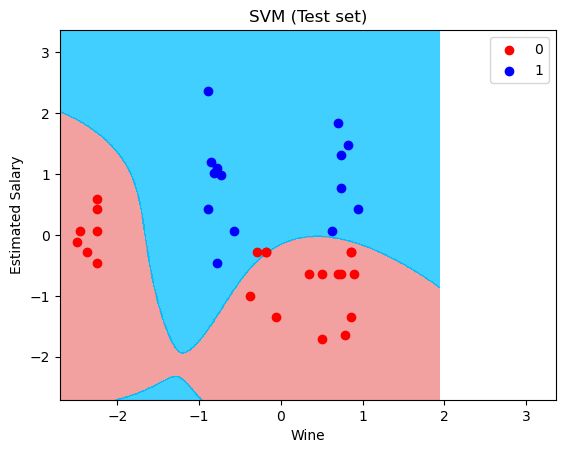

In [187]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=.01),
                    np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=.75, cmap=ListedColormap(('lightcoral','deepskyblue')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               color=ListedColormap(('red','blue'))(i),label=j)
plt.title("SVM (Test set)")
plt.xlabel("Wine")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

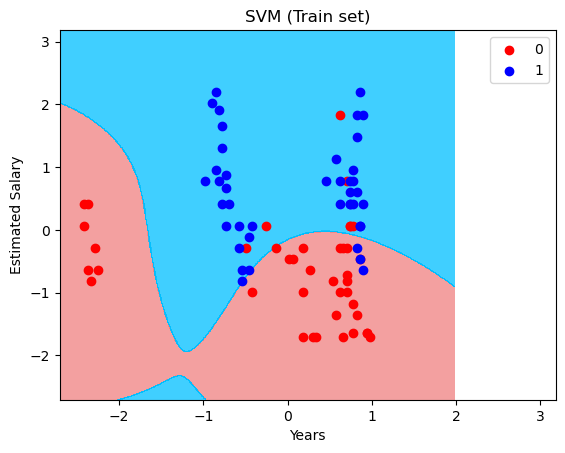

In [188]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=.01),
                    np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=.75, cmap=ListedColormap(('lightcoral','deepskyblue')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               color=ListedColormap(('red','blue'))(i),label=j)
plt.title("SVM (Train set)")
plt.xlabel("Years")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# linear SVM

In [189]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state =0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [190]:
y_pred_test = classifier.predict(X_test)

In [191]:
y_pred_train = classifier.predict(X_train)

In [192]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
acc_linear_test=accuracy_score(y_test, y_pred_test)

[[20  2]
 [ 1 13]]


In [193]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
acc_linear_train=accuracy_score(y_train, y_pred_train)

[[34  8]
 [ 9 33]]


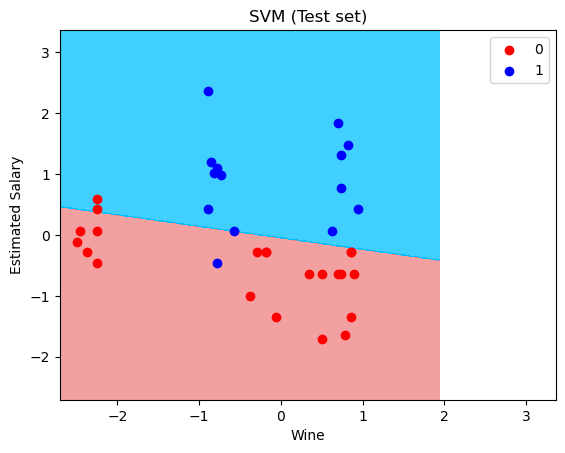

In [194]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=.01),
                    np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=.75, cmap=ListedColormap(('lightcoral','deepskyblue')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               color=ListedColormap(('red','blue'))(i),label=j)
plt.title("SVM (Test set)")
plt.xlabel("Wine")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

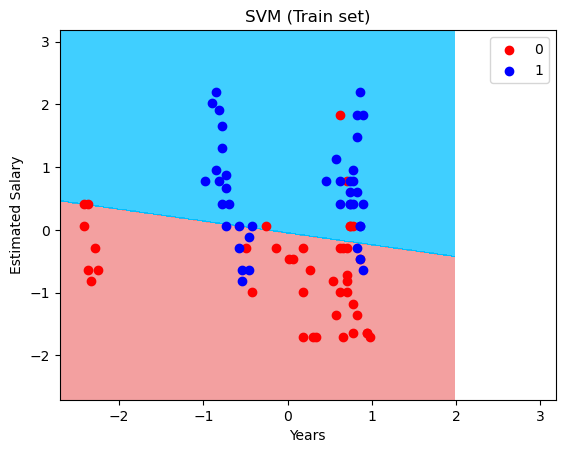

In [195]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=.01),
                    np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=.75, cmap=ListedColormap(('lightcoral','deepskyblue')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               color=ListedColormap(('red','blue'))(i),label=j)
plt.title("SVM (Train set)")
plt.xlabel("Years")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# poly SVM

In [196]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state =0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [197]:
y_pred_test = classifier.predict(X_test)

In [198]:
y_pred_train = classifier.predict(X_train)

In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
acc_poly_test=accuracy_score(y_test, y_pred_test)

[[ 9 13]
 [ 0 14]]


In [200]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
acc_poly_train=accuracy_score(y_train, y_pred_train)

[[22 20]
 [ 0 42]]


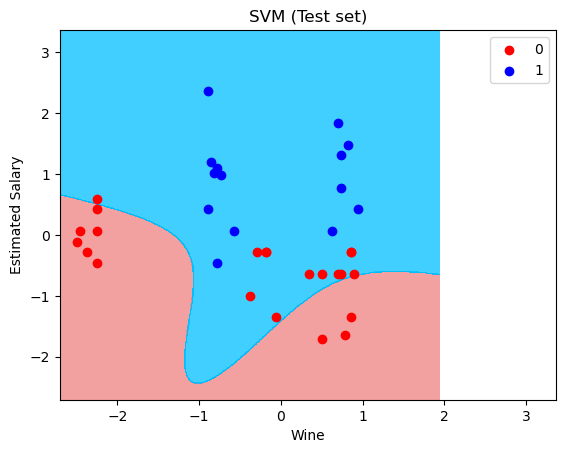

In [201]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=.01),
                    np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=.75, cmap=ListedColormap(('lightcoral','deepskyblue')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               color=ListedColormap(('red','blue'))(i),label=j)
plt.title("SVM (Test set)")
plt.xlabel("Wine")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

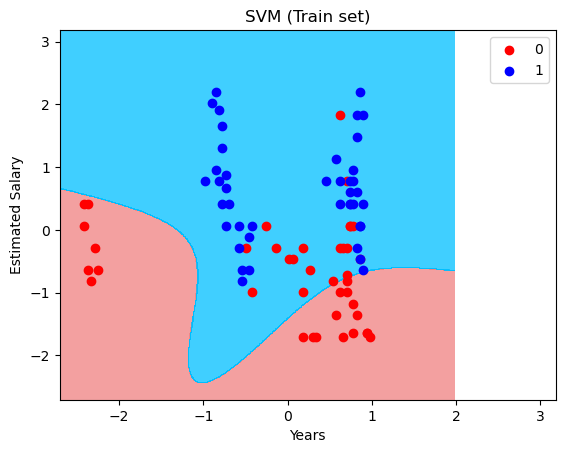

In [202]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=.01),
                    np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=.75, cmap=ListedColormap(('lightcoral','deepskyblue')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               color=ListedColormap(('red','blue'))(i),label=j)
plt.title("SVM (Train set)")
plt.xlabel("Years")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

# sigmoid SVM

In [203]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state =0)
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [204]:
y_pred_test = classifier.predict(X_test)

In [205]:
y_pred_train = classifier.predict(X_train)

In [206]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
acc_sigmoid_test=accuracy_score(y_test, y_pred_test)

[[15  7]
 [ 3 11]]


In [207]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
acc_sigmoid_train=accuracy_score(y_train, y_pred_train)

[[26 16]
 [13 29]]


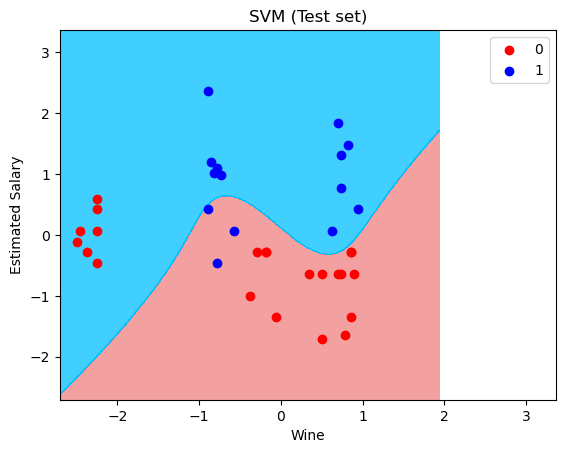

In [208]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=.01),
                    np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=.75, cmap=ListedColormap(('lightcoral','deepskyblue')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               color=ListedColormap(('red','blue'))(i),label=j)
plt.title("SVM (Test set)")
plt.xlabel("Wine")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

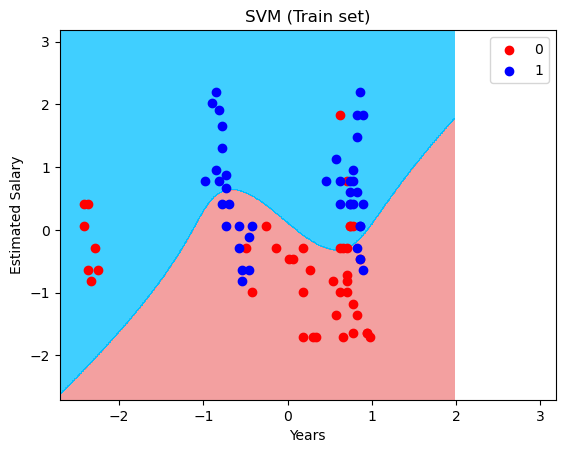

In [209]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=.01),
                    np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=.75, cmap=ListedColormap(('lightcoral','deepskyblue')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               color=ListedColormap(('red','blue'))(i),label=j)
plt.title("SVM (Train set)")
plt.xlabel("Years")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

In [211]:
print("RBF SVM")
print("For train: ",acc_rbf_train)
print("For test: ",acc_rbf_test)
print("Model nadmiernie dopasowany")
print("\n")

print("Linear SVM")
print("For train: ",acc_linear_train)
print("For test: ",acc_linear_test)
print("Model nadmiernie dopasowany")
print("\n")

print("Poly SVM")
print("For train: ",acc_poly_train)
print("For test: ",acc_poly_test)
print("Model dopasowany")
print("\n")

print("Sigmoid SVM")
print("For train: ",acc_sigmoid_train)
print("For test: ",acc_sigmoid_test)
print("Model nadmiernie dopasowany")

RBF SVM
For train:  0.8809523809523809
For test:  0.9166666666666666
Model nadmiernie dopasowany


Linear SVM
For train:  0.7976190476190477
For test:  0.9166666666666666
Model nadmiernie dopasowany


Poly SVM
For train:  0.7619047619047619
For test:  0.6388888888888888
Model dopasowany


Sigmoid SVM
For train:  0.6547619047619048
For test:  0.7222222222222222
Model nadmiernie dopasowany


# Najlepszy wskaźnik accuracy posiada jądro Poly.